In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_rmse_violin(metrics_dir, model="gru", aggregation="fedAvg", target_round=50):
    rmse_list = []
    client_ids = []

    # Loop through files
    for fname in os.listdir(metrics_dir):
        if fname.endswith(f"{model}_{aggregation}_metrics.csv"):
            cid_str = fname.split("_")[0]
            try:
                cid = int(cid_str.replace("cid", ""))
            except:
                continue

            file_path = os.path.join(metrics_dir, fname)
            df = pd.read_csv(file_path)

            # Filter for the specific round
            round_df = df[df['round'] == target_round]
            if not round_df.empty:
                rmse = round_df.iloc[0]['RMSE']
                rmse_list.append(rmse)
                client_ids.append(cid)

    # Create DataFrame
    rmse_df = pd.DataFrame({
        "Client ID": client_ids,
        "RMSE": rmse_list
    })

    # Plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(y="RMSE", data=rmse_df, inner="quartile", color="lightblue")
    plt.title(f"RMSE Distribution at Round {target_round}\nModel: {model.upper()} | Aggregation: {aggregation}")
    plt.ylabel("RMSE")
    plt.xlabel("Clients")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Save plot
    output_path = f"rmse_violin_{model}_{aggregation}_round{target_round}.png"
    plt.savefig(output_path, dpi=300)
    plt.show()

    print(f"Saved violin plot to: {output_path}")


In [22]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def collect_rmse_for_all_strategies(metrics_dir, model="gru", aggregation_strategies=["fedAvg", "FedProx", "SCAFFOLD"], target_round=50,metric="RMSE"):
    all_data = []

    for agg in aggregation_strategies:
        for fname in os.listdir(metrics_dir):
            if fname.endswith(f"{model}_{agg}_metrics.csv"):
                cid_str = fname.split("_")[0]
                try:
                    cid = int(cid_str.replace("cid", ""))
                except:
                    continue

                file_path = os.path.join(metrics_dir, fname)
                df = pd.read_csv(file_path)

                round_df = df[df['round'] == target_round]
                if not round_df.empty:
                    rmse = round_df.iloc[0][metric]
                    all_data.append({
                        "Client ID": cid,
                        metric: rmse,
                        "Strategy": agg
                    })

    return pd.DataFrame(all_data)

def plot_rmse_violin_multiple_strategies(metrics_dir, model="gru", aggregation_strategies=["fedAvg", "FedProx", "SCAFFOLD"], target_round=50,metric="RMSE"):
    df_all = collect_rmse_for_all_strategies(metrics_dir, model, aggregation_strategies, target_round,metric)

    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Strategy", y=metric, data=df_all, inner="quartile", palette="Set2")
    plt.title(f"{metric} Distribution Across Aggregation Strategies\nModel: {model.upper()} | Round: {target_round}")
    plt.xlabel("Aggregation Strategy")
    plt.ylabel(metric)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    output_path = f"rmse_violin_all_{model}_round{target_round}_{metric}.png"
    plt.savefig(output_path, dpi=500)
    plt.show()

    print(f"Saved violin plot to: {output_path}")


/tmp/ipykernel_1412220/3968817920.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Strategy", y=metric, data=df_all, inner="quartile", palette="Set2")


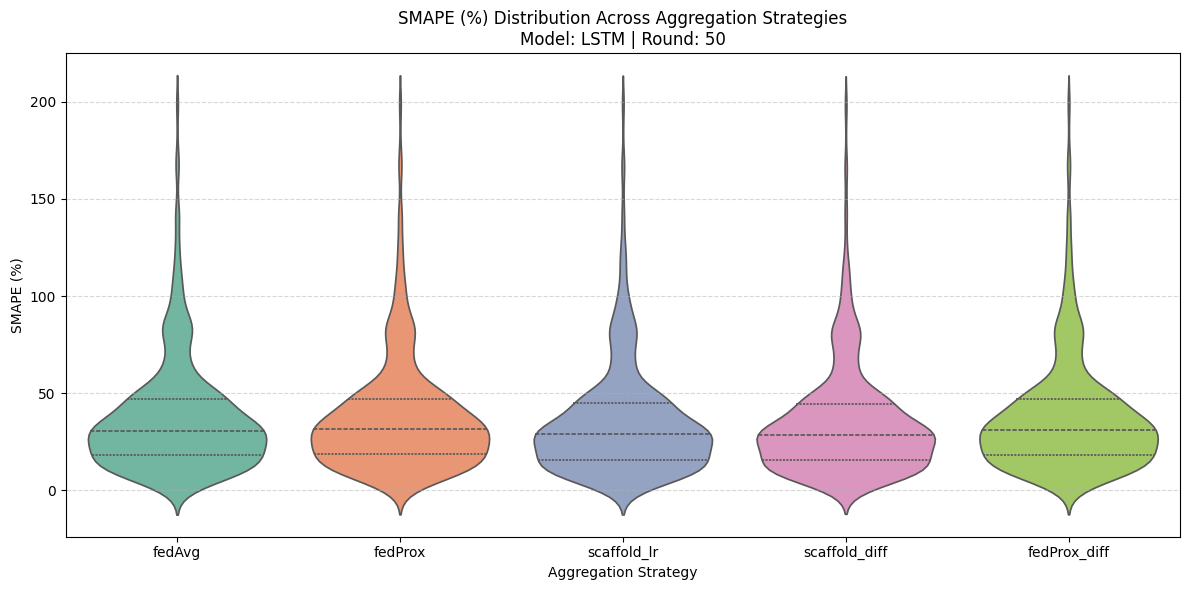

Saved violin plot to: rmse_violin_all_lstm_round50_SMAPE (%).png


In [24]:

# Example usage
plot_rmse_violin_multiple_strategies(
    metrics_dir="metrics40-50-168",
    model="lstm",
    aggregation_strategies=["fedAvg", "fedProx", "scaffold_lr","scaffold_diff","fedProx_diff"],
    target_round=50,
    metric = "SMAPE (%)"
)


In [29]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def collect_rmse_for_all_strategies(metrics_dir, model="gru", aggregation_strategies=["fedAvg", "FedProx", "SCAFFOLD"], target_round=50, metric="RMSE"):
    all_data = []

    for agg in aggregation_strategies:
        for fname in os.listdir(metrics_dir):
            if fname.endswith(f"{model}_{agg}_metrics.csv"):
                cid_str = fname.split("_")[0]
                try:
                    cid = int(cid_str.replace("cid", ""))
                except:
                    continue

                file_path = os.path.join(metrics_dir, fname)
                df = pd.read_csv(file_path)

                round_df = df[df['round'] == target_round]
                if not round_df.empty:
                    value = round_df.iloc[0][metric]
                    all_data.append({
                        "Client ID": cid,
                        metric: value,
                        "Strategy": agg
                    })

    return pd.DataFrame(all_data)

def plot_rmse_boxplot_multiple_strategies(metrics_dir, model="gru", aggregation_strategies=["fedAvg", "FedProx", "SCAFFOLD"], target_round=50, metric="RMSE"):
    df_all = collect_rmse_for_all_strategies(metrics_dir, model, aggregation_strategies, target_round, metric)

    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x="Strategy",
        y=metric,
        data=df_all,
        palette="Set2"
    )
    plt.title(f"{metric} Distribution Across Aggregation Strategies\nModel: {model.upper()} | Round: {target_round}")
    plt.xlabel("Aggregation Strategy")
    plt.ylabel(metric)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    output_path = f"{metric.lower()}_boxplot_all_{model}_round{target_round}.png"
    plt.savefig(output_path, dpi=500)
    plt.show()

    print(f"Saved box plot to: {output_path}")


/tmp/ipykernel_1412220/3792127331.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


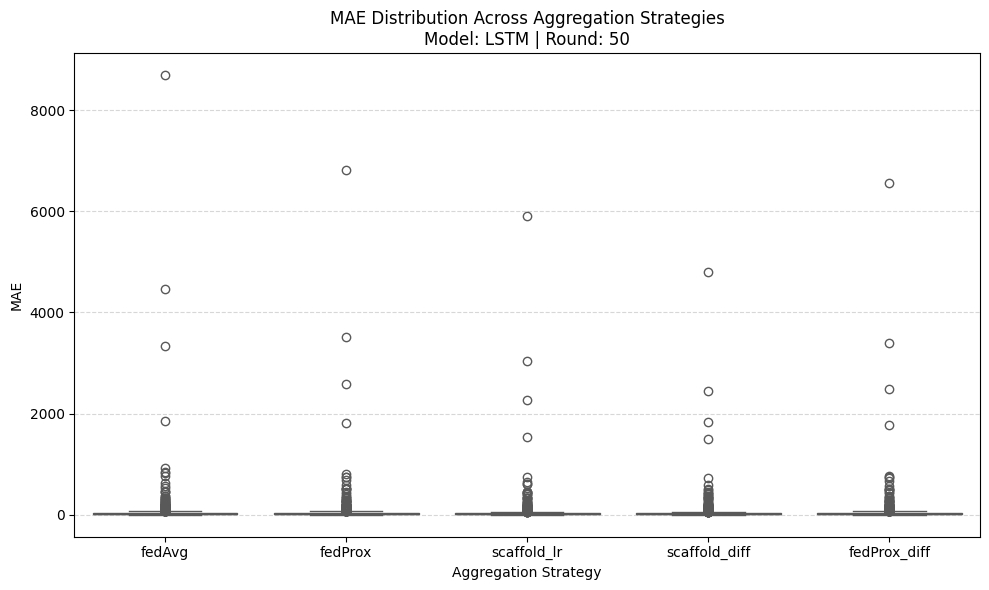

Saved box plot to: mae_boxplot_all_lstm_round50.png


In [30]:
plot_rmse_boxplot_multiple_strategies(
    metrics_dir="metrics40-50-168",
    model="lstm",
    aggregation_strategies=["fedAvg", "fedProx", "scaffold_lr","scaffold_diff","fedProx_diff"],
    target_round=50,
    metric = "MAE"
)

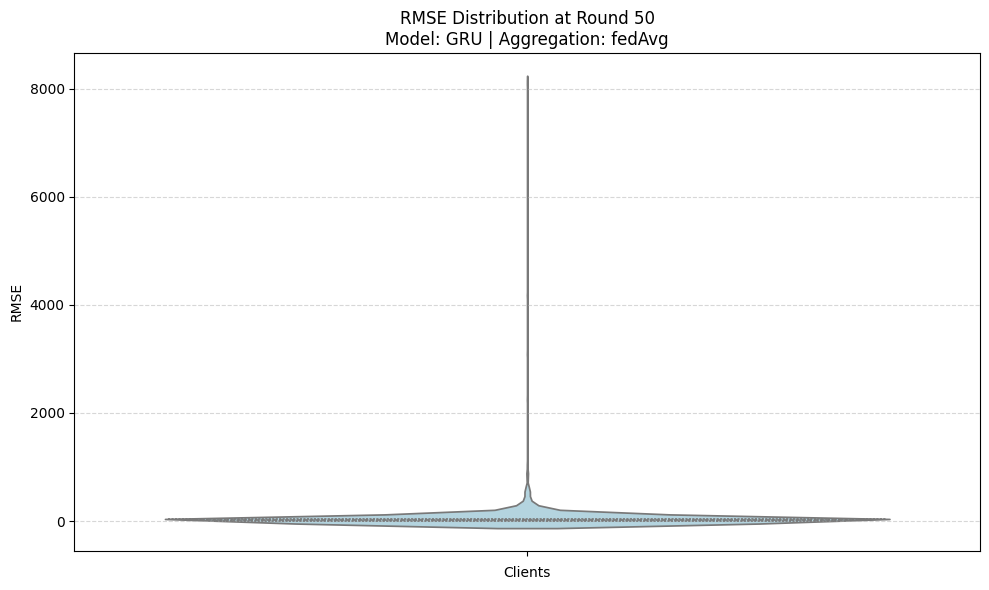

Saved violin plot to: rmse_violin_gru_fedAvg_round50.png


In [3]:

# Example usage
plot_rmse_violin("metrics40-50-168", model="gru", aggregation="fedAvg", target_round=50)


In [50]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def collect_rmse_for_all_strategies(metrics_dir, model="gru", aggregation_strategies=["fedAvg", "FedProx", "SCAFFOLD"], target_round=50, metric="RMSE", remove_top_k=140):
    all_data = []

    for agg in aggregation_strategies:
        for fname in os.listdir(metrics_dir):
            if fname.endswith(f"{model}_{agg}_metrics.csv"):
                cid_str = fname.split("_")[0]
                try:
                    cid = int(cid_str.replace("cid", ""))
                except:
                    continue

                file_path = os.path.join(metrics_dir, fname)
                df = pd.read_csv(file_path)

                round_df = df[df['round'] == target_round]
                if not round_df.empty:
                    value = round_df.iloc[0][metric]
                    all_data.append({
                        "Client ID": cid,
                        metric: value,
                        "Strategy": agg
                    })

    df_all = pd.DataFrame(all_data)

    # Remove top-k highest values (outliers) based on the metric
    df_all_sorted = df_all.sort_values(by=metric, ascending=False)
    df_filtered = df_all_sorted.iloc[remove_top_k:]  # Keep all except top-k

    return df_filtered

def plot_rmse_boxplot_multiple_strategies(metrics_dir, model="gru", aggregation_strategies=["fedAvg", "FedProx", "SCAFFOLD"], target_round=50, metric="RMSE", remove_top_k=140):
    df_all = collect_rmse_for_all_strategies(metrics_dir, model, aggregation_strategies, target_round, metric, remove_top_k)

    plt.figure(figsize=(50, 12))
    sns.boxplot(
        x="Strategy",
        y=metric,
        data=df_all,
        palette="Set2"
    )
    plt.title(f"{metric} Distribution Across Strategies (Excl. Top {remove_top_k} Clients)\nModel: {model.upper()} | Round: {target_round}")
    plt.xlabel("Aggregation Strategy")
    plt.ylabel(metric)
    plt.grid(axis='y', linestyle='--', alpha=0.9)
    plt.tight_layout()

    output_path = f"{metric.lower()}_boxplot_filtered_top{remove_top_k}_{model}_round{target_round}.png"
    plt.savefig(output_path, dpi=300)
    plt.show()

    print(f"Saved box plot to: {output_path}")


/tmp/ipykernel_1412220/1856674693.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


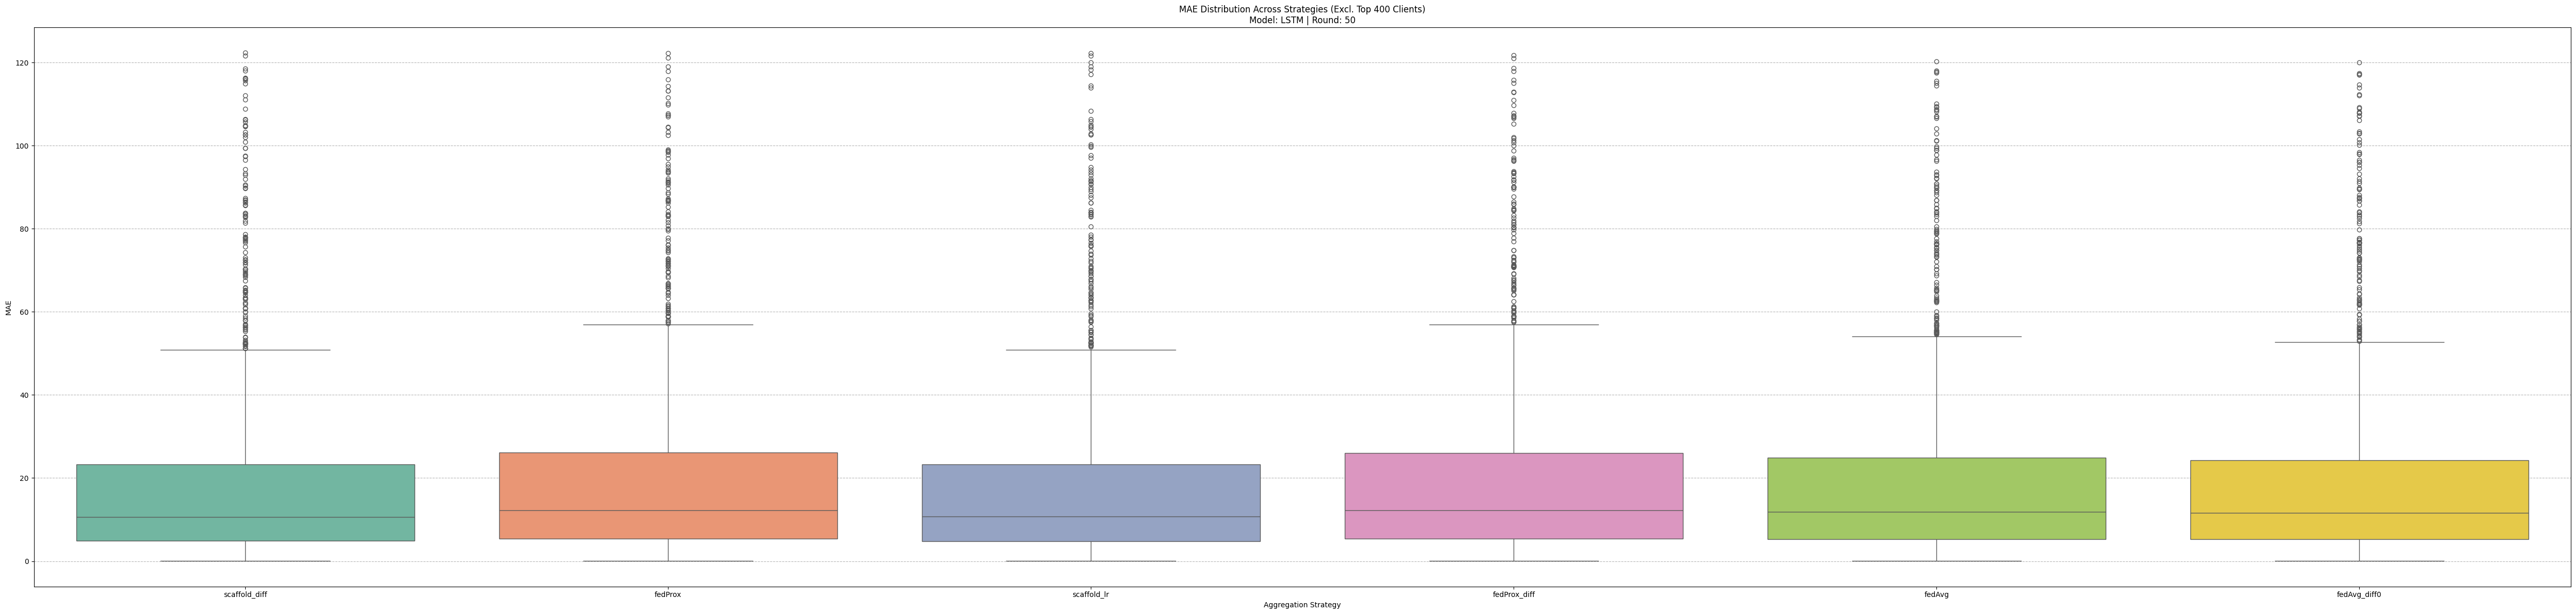

Saved box plot to: mae_boxplot_filtered_top400_lstm_round50.png


In [52]:
plot_rmse_boxplot_multiple_strategies(
    metrics_dir="metrics40-50-168",
    model="lstm",
    aggregation_strategies=["scaffold_lr","scaffold_diff","fedAvg","fedAvg_diff0","fedProx","fedProx_diff"],
    target_round=50,
    metric = "MAE",
    remove_top_k=400
)

In [55]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def collect_rmse_for_all_strategies(metrics_dir, model="gru", aggregation_strategies=["fedAvg", "FedProx", "SCAFFOLD"], target_round=50, metric="RMSE", remove_top_k=140):
    all_data = []

    for agg in aggregation_strategies:
        for fname in os.listdir(metrics_dir):
            if fname.endswith(f"{model}_{agg}_metrics.csv"):
                cid_str = fname.split("_")[0]
                try:
                    cid = int(cid_str.replace("cid", ""))
                except:
                    continue

                file_path = os.path.join(metrics_dir, fname)
                df = pd.read_csv(file_path)

                round_df = df[df['round'] == target_round]
                if not round_df.empty:
                    value = round_df.iloc[0][metric]
                    all_data.append({
                        "Client ID": cid,
                        metric: value,
                        "Strategy": agg
                    })

    df_all = pd.DataFrame(all_data)

    # Remove top-k highest values (outliers) based on the metric
    df_all_sorted = df_all.sort_values(by=metric, ascending=False)
    df_filtered = df_all_sorted.iloc[remove_top_k:]  # Keep all except top-k

    return df_filtered


def plot_rmse_violinplot_multiple_strategies(metrics_dir, model="gru", aggregation_strategies=["fedAvg", "FedProx", "SCAFFOLD"], target_round=50, metric="RMSE", remove_top_k=140):
    df_all = collect_rmse_for_all_strategies(metrics_dir, model, aggregation_strategies, target_round, metric, remove_top_k)

    # Sort strategies alphabetically for consistent ordering on x-axis
    df_all["Strategy"] = pd.Categorical(df_all["Strategy"], categories=sorted(df_all["Strategy"].unique()), ordered=True)

    plt.figure(figsize=(50, 12))
    sns.violinplot(
        x="Strategy",
        y=metric,
        data=df_all,
        palette="Set2",
        inner="box",
        scale="width",
        cut=0
    )
    plt.title(f"{metric} Distribution Across Strategies (Excl. Top {remove_top_k} Clients)\nModel: {model.upper()} | Round: {target_round}")
    plt.xlabel("Aggregation Strategy")
    plt.ylabel(metric)
    plt.grid(axis='y', linestyle='--', alpha=0.9)
    plt.tight_layout()

    output_path = f"{metric.lower()}_violinplot_filtered_top{remove_top_k}_{model}_round{target_round}.png"
    plt.savefig(output_path, dpi=300)
    plt.show()

    print(f"Saved violin plot to: {output_path}")


# def plot_rmse_violinplot_multiple_strategies(metrics_dir, model="gru", aggregation_strategies=["fedAvg", "FedProx", "SCAFFOLD"], target_round=50, metric="RMSE", remove_top_k=140):
#     df_all = collect_rmse_for_all_strategies(metrics_dir, model, aggregation_strategies, target_round, metric, remove_top_k)

#     plt.figure(figsize=(50, 12))
#     sns.violinplot(
#         x="Strategy",
#         y=metric,
#         data=df_all,
#         palette="Set2",
#         inner="box",  # Show inner boxplot inside violins
#         scale="width",
#         cut=0
#     )
#     plt.title(f"{metric} Distribution Across Strategies (Excl. Top {remove_top_k} Clients)\nModel: {model.upper()} | Round: {target_round}")
#     plt.xlabel("Aggregation Strategy")
#     plt.ylabel(metric)
#     plt.grid(axis='y', linestyle='--', alpha=0.9)
#     plt.tight_layout()

#     output_path = f"{metric.lower()}_violinplot_filtered_top{remove_top_k}_{model}_round{target_round}.png"
#     plt.savefig(output_path, dpi=300)
#     plt.show()

#     print(f"Saved violin plot to: {output_path}")


/tmp/ipykernel_1412220/1440503901.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_1412220/1440503901.py:46: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


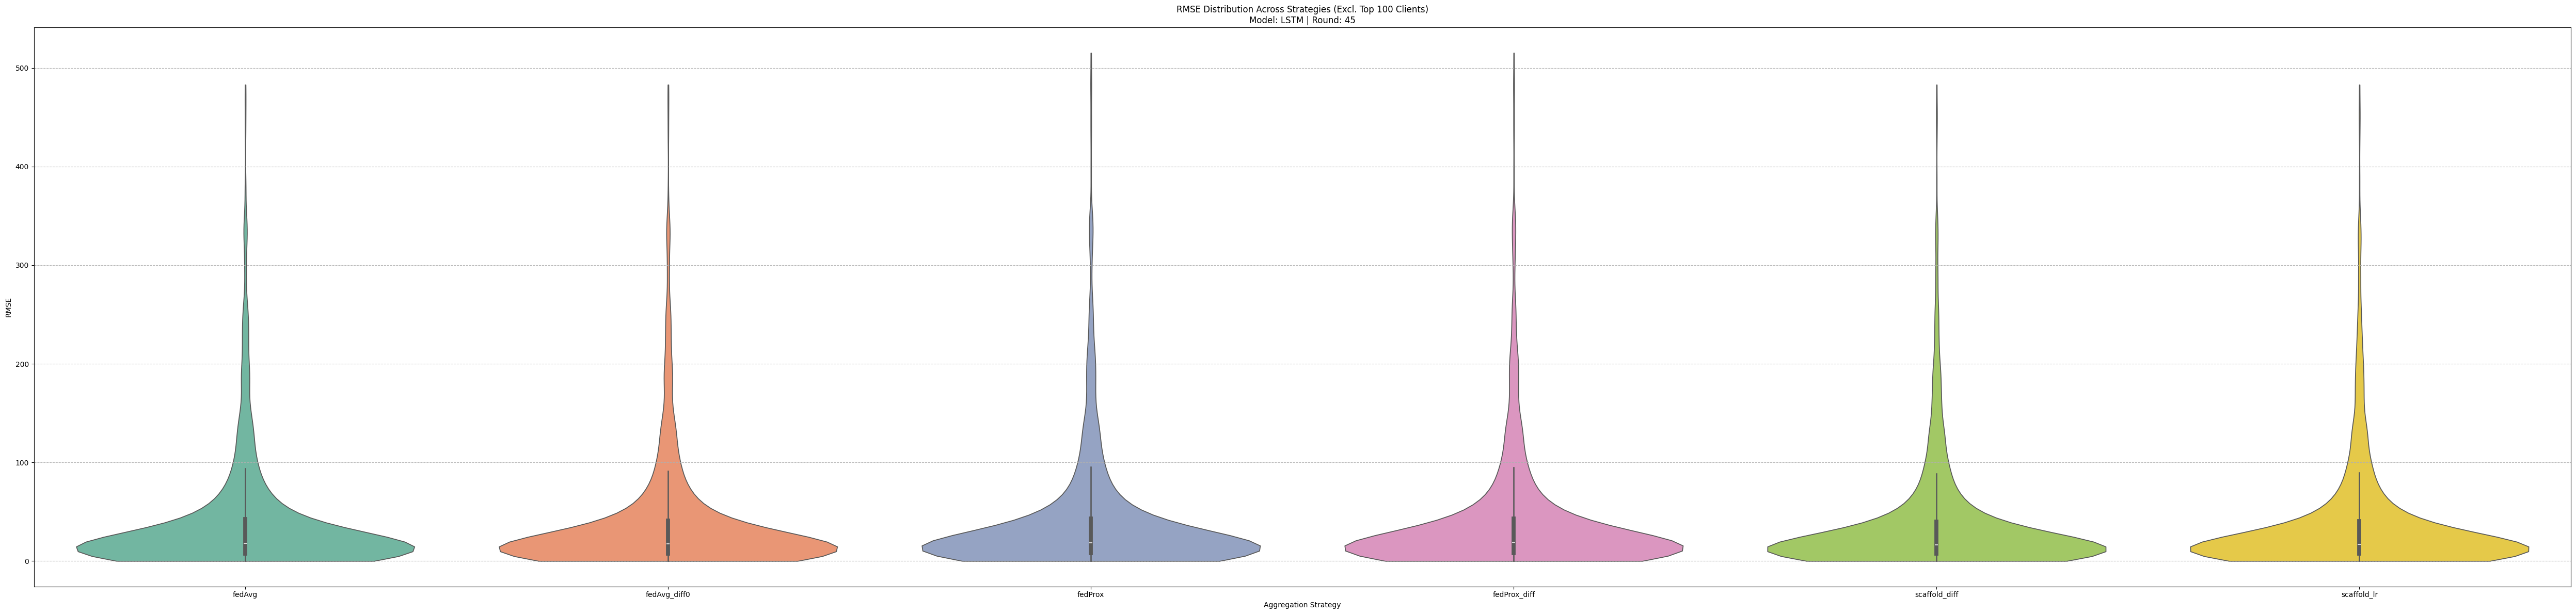

Saved violin plot to: rmse_violinplot_filtered_top100_lstm_round45.png


In [61]:
plot_rmse_violinplot_multiple_strategies(
    metrics_dir="metrics40-50-168",
    model="lstm",
    aggregation_strategies=["scaffold_lr","scaffold_diff","fedAvg","fedAvg_diff0","fedProx","fedProx_diff"],
    target_round=45,
    metric = "RMSE",
    remove_top_k=100
)

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Path to the folder with CSV files
folder_path = "predictions"

# SMAPE calculation
def smape(y_true, y_pred):
    return 100 * np.mean(2.0 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))

# Iterate through files with "round" in the filename
for filename in os.listdir(folder_path):
    if filename.endswith(".csv") and "round" in filename:
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        y_true = df["true"].values
        y_pred = df["pred"].values

        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        smape_value = smape(y_true, y_pred)

        print(f"Results for {filename}:")
        print(f"  MAE  : {mae:.4f}")
        print(f"  MAPE : {mape:.4f}%")
        print(f"  MSE  : {mse:.4f}")
        print(f"  RMSE : {rmse:.4f}")
        print(f"  SMAPE: {smape_value:.4f}%\n")


In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Path to the folder with CSV files
folder_path = "predictions"
output_csv = "metrics_summary.csv"

# SMAPE function
def smape(y_true, y_pred):
    return 100 * np.mean(2.0 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))

# Collect metrics in a list
results = []

# Iterate through files with "round" in the filename
for filename in os.listdir(folder_path):
    if filename.endswith(".csv") and "round" in filename:
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        y_true = df["true"].values
        if(y_true.min()<=0):
            continue
        y_pred = df["pred"].values

        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        smape_value = smape(y_true, y_pred)

        results.append({
            "filename": filename,
            "MAE": mae,
            "MAPE": mape,
            "MSE": mse,
            "RMSE": rmse,
            "SMAPE": smape_value
        })

# Convert to DataFrame and save as CSV
results_df = pd.DataFrame(results)
results_df.to_csv(output_csv, index=False)

print(f"Saved metrics for {len(results)} files to {output_csv}")


Saved metrics for 697 files to metrics_summary.csv


In [7]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Path to the folder with CSV files
folder_path = "predictions"
output_csv = "train_metrics_summary.csv"

# SMAPE function
def smape(y_true, y_pred):
    return 100 * np.mean(2.0 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))

# Collect metrics in a list
results = []

# Iterate through files with "round" in the filename
for filename in os.listdir(folder_path):
    if filename.endswith(".csv") and ("round" in filename) and ("train" in filename):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        y_true = df["true"].values
        if(y_true.min()<=0):
            continue
        y_pred = df["pred"].values

        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        smape_value = smape(y_true, y_pred)

        results.append({
            "filename": filename,
            "MAE": mae,
            "MAPE": mape,
            "MSE": mse,
            "RMSE": rmse,
            "SMAPE": smape_value
        })

# Convert to DataFrame and save as CSV
results_df = pd.DataFrame(results)
results_df.to_csv(output_csv, index=False)

print(f"Saved metrics for {len(results)} files to {output_csv}")


Saved metrics for 342 files to train_metrics_summary.csv


In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Path to the folder with CSV files
folder_path = "predictions"
output_csv = "test_metrics_summary.csv"

# SMAPE function
def smape(y_true, y_pred):
    return 100 * np.mean(2.0 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))

# Collect metrics in a list
results = []

# Iterate through files with "round" in the filename
for filename in os.listdir(folder_path):
    if filename.endswith(".csv") and ("round" in filename) and ("test" in filename):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        y_true = df["true"].values
        if(y_true.min()<=0):
            continue
        y_pred = df["pred"].values

        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        smape_value = smape(y_true, y_pred)

        results.append({
            "filename": filename,
            "MAE": mae,
            "MAPE": mape,
            "MSE": mse,
            "RMSE": rmse,
            "SMAPE": smape_value
        })

# Convert to DataFrame and save as CSV
results_df = pd.DataFrame(results)
results_df.to_csv(output_csv, index=False)

print(f"Saved metrics for {len(results)} files to {output_csv}")


Saved metrics for 357 files to test_metrics_summary.csv


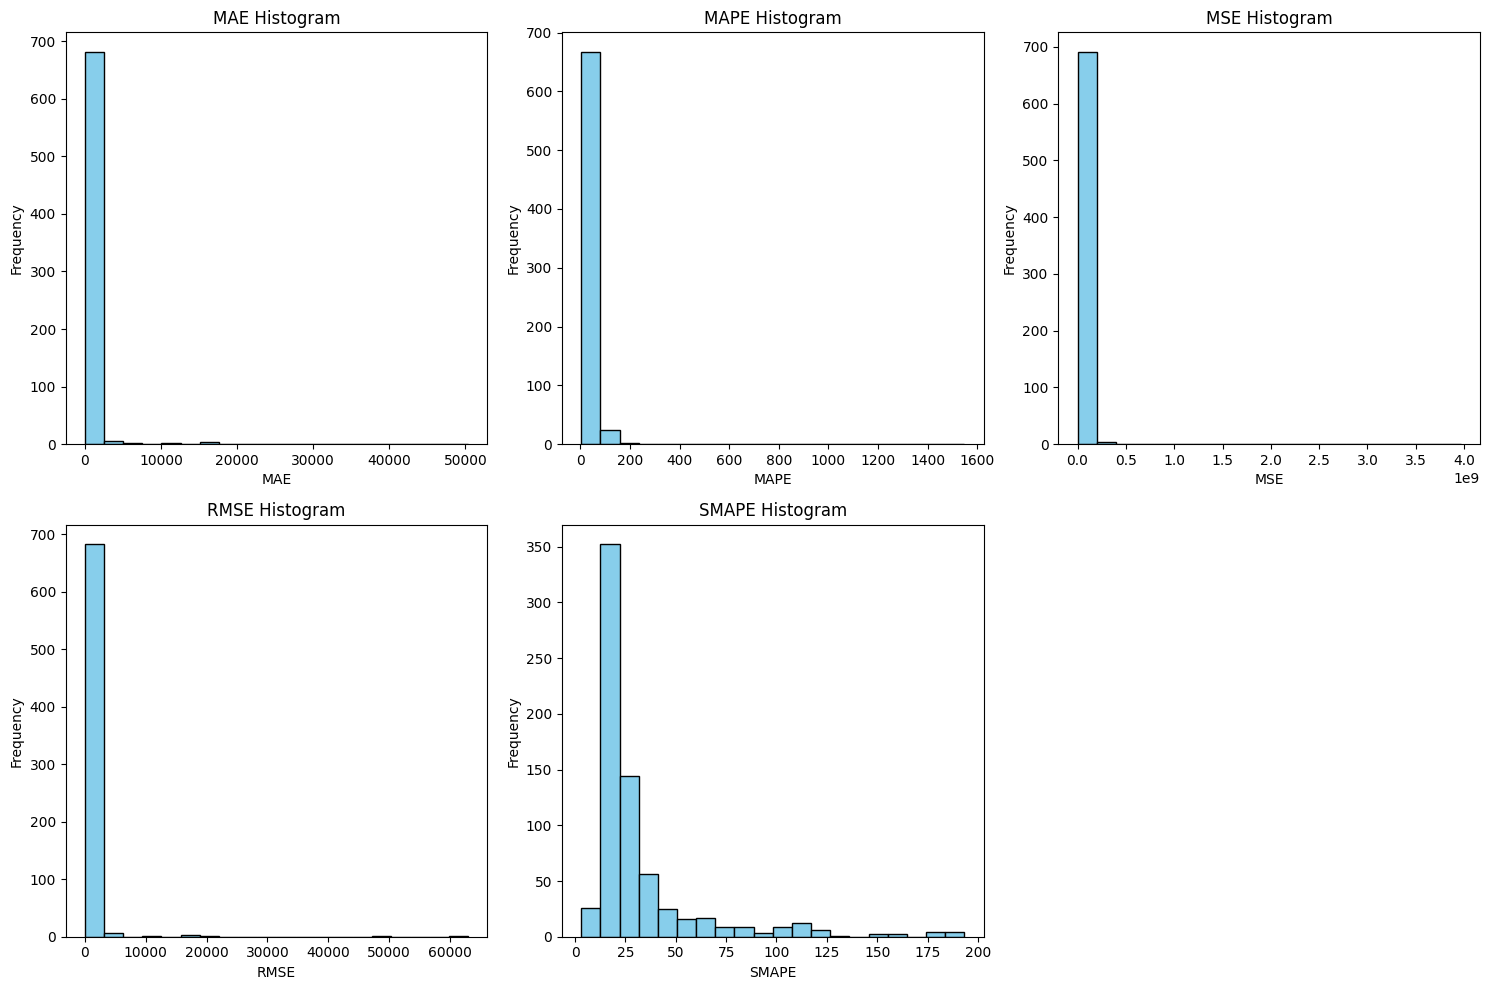

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the metrics file
df = pd.read_csv("metrics_summary.csv")

# List of metric columns to plot
metrics = ["MAE", "MAPE", "MSE", "RMSE", "SMAPE"]

# Plot histograms
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[metric], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"{metric} Histogram")
    plt.xlabel(metric)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


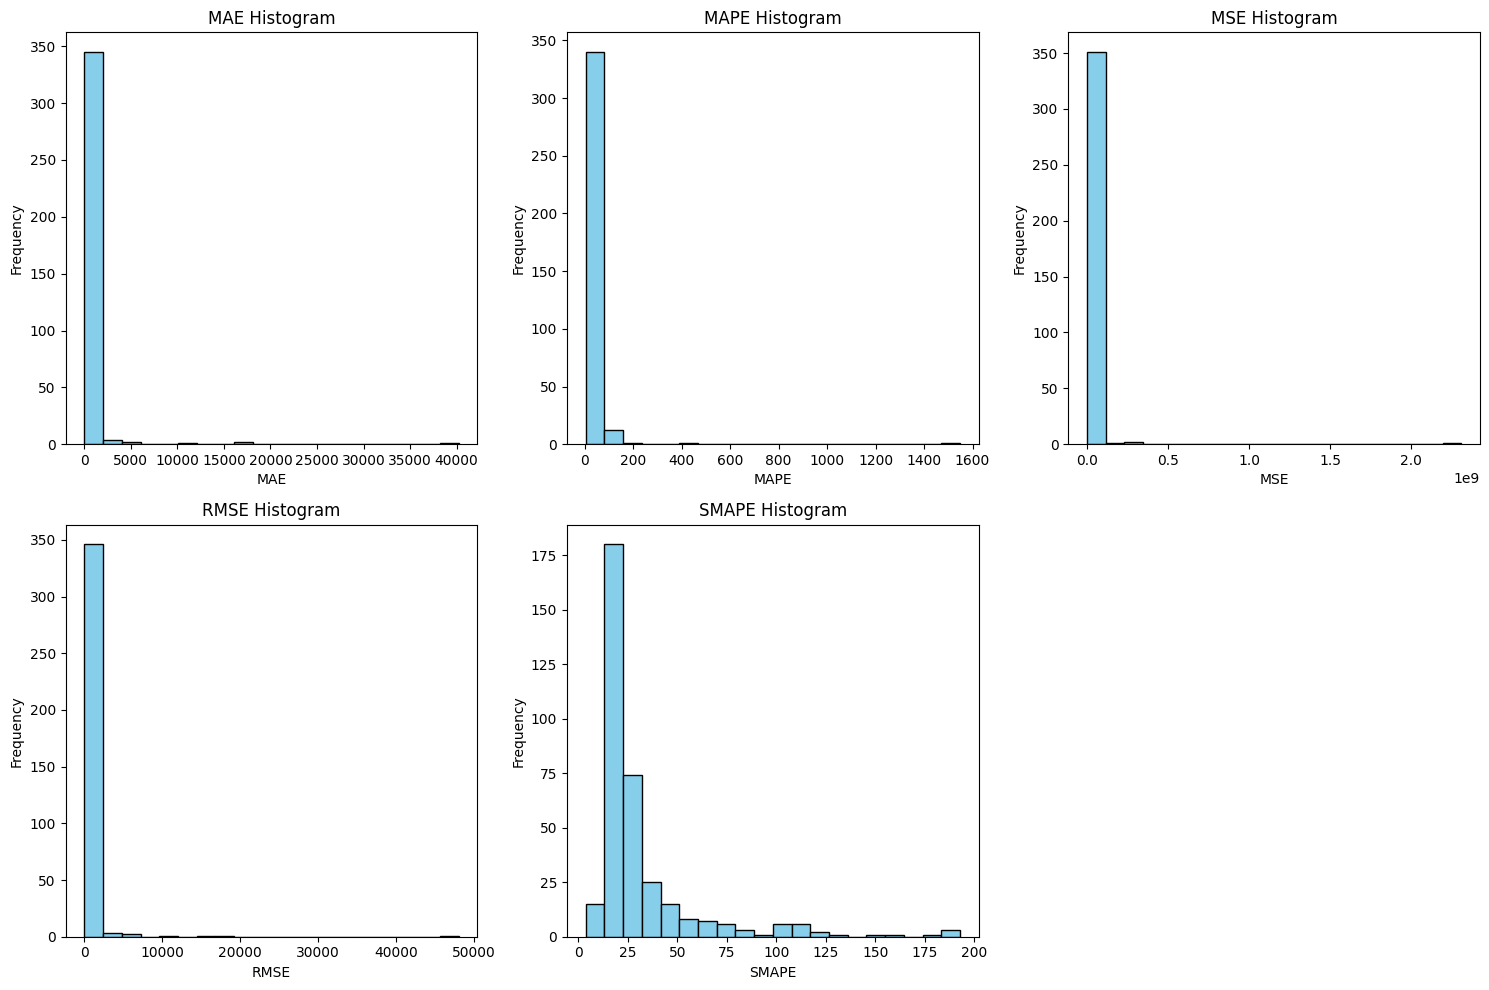

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the metrics file
df = pd.read_csv("test_metrics_summary.csv")

# List of metric columns to plot
metrics = ["MAE", "MAPE", "MSE", "RMSE", "SMAPE"]

# Plot histograms
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[metric], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"{metric} Histogram")
    plt.xlabel(metric)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


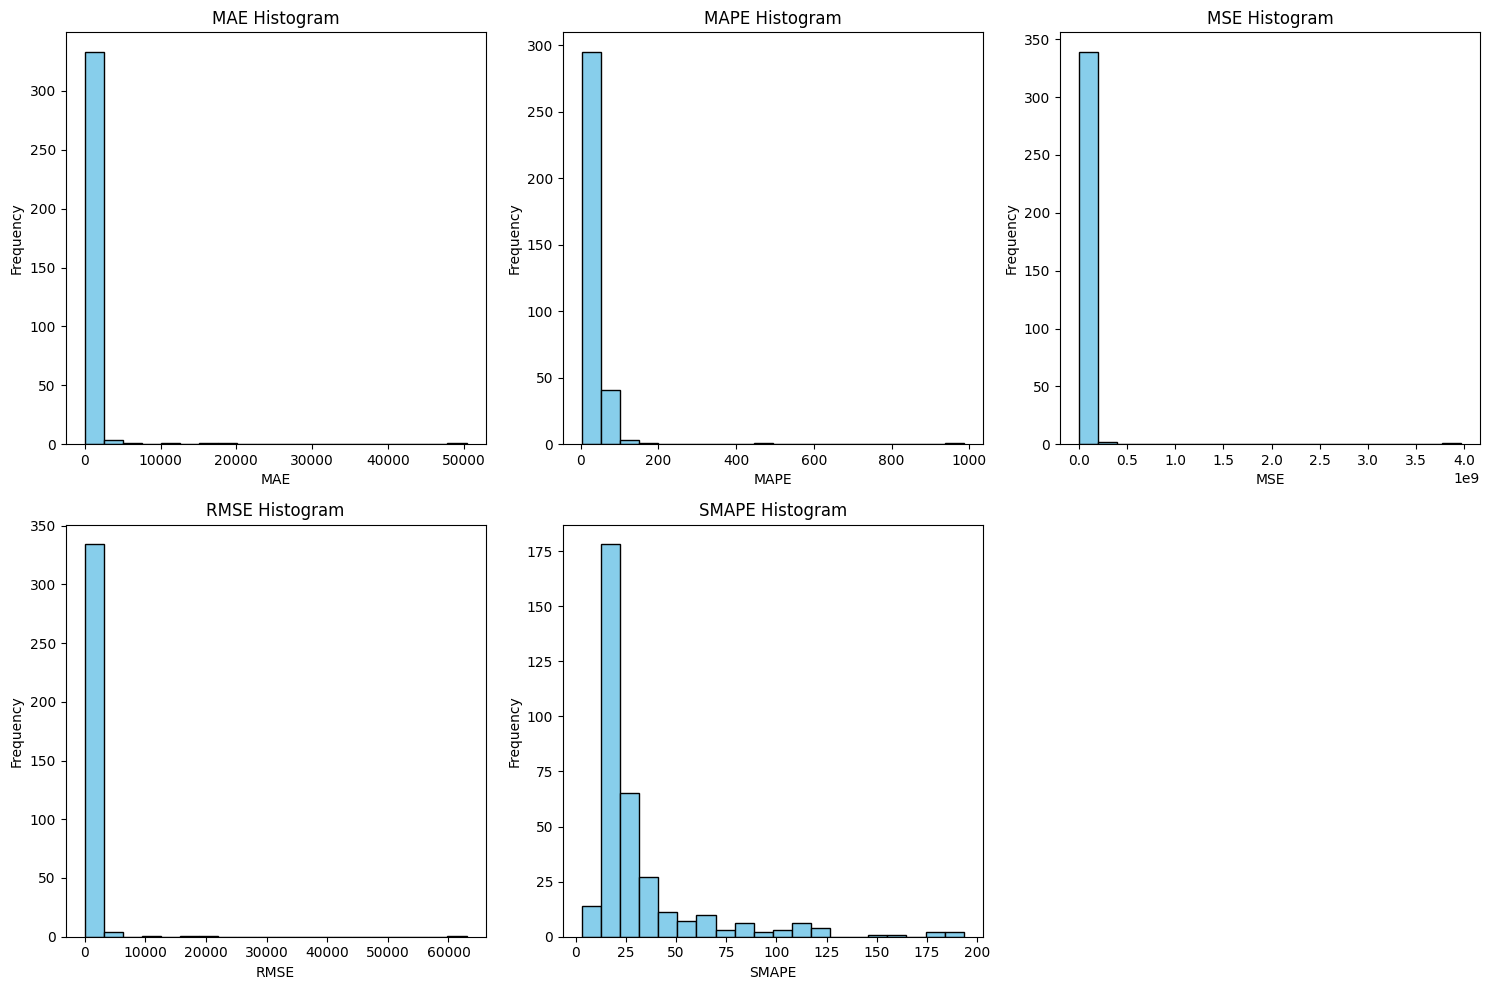

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the metrics file
df = pd.read_csv("train_metrics_summary.csv")

# List of metric columns to plot
metrics = ["MAE", "MAPE", "MSE", "RMSE", "SMAPE"]

# Plot histograms
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[metric], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"{metric} Histogram")
    plt.xlabel(metric)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [9]:
import torch
from Models import MoELSTM

input_window = 30
output_window = 10

# Create model instance
model = MoELSTM(
            input_size=1, hidden_size=64, output_size=8,
            num_experts=5, ffn_hidden_size=32
        )

# Load state_dict
model.load_state_dict(torch.load("checkpoints\global_model_round_1.pth", map_location="cpu"))

# Move to device and eval mode
model = model.to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()


c:\Users\srina\OneDrive\Documents\Federated Learning - Vandana\Federated-Learning\Paper Implementation\myapp2\flow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\srina\AppData\Local\Temp\ipykernel_53136\4104735373.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicit

MoELSTM(
  (lower_lstm): LSTM(1, 64, batch_first=True)
  (experts): ModuleList(
    (0-4): 5 x Linear(in_features=64, out_features=32, bias=True)
  )
  (expert_activation): ReLU()
  (gate): Linear(in_features=64, out_features=5, bias=True)
  (gate_activation): Softmax(dim=-1)
  (upper_lstm): LSTM(32, 64, batch_first=True)
  (final_ffn): Linear(in_features=64, out_features=32, bias=True)
  (final_activation): ReLU()
  (output_layer): Linear(in_features=32, out_features=8, bias=True)
)

In [61]:
from utils_fns import rolling_forecast_one_building
from Preprocess import load_building_series
from darts import TimeSeries

In [62]:
# def load_energy_data(path):
#     df = pd.read_csv(path)
#     ts = TimeSeries.from_dataframe(df, 'timestamp', 'kWh')
#     train_series, test_series = ts.split_before(0.75)
#     return train_series, test_series
    
import csv
from darts.dataprocessing.transformers import Scaler
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler

def load_energy_data(path):
    df = pd.read_csv(path)
    min = df['kWh'].min()
    max = df['kWh'].max()

    # Save to log file
    # save_path = "building_min_max_inference.csv"
    # file_exists = Path(save_path).is_file()

    # with open(save_path, mode='a', newline='') as f:
        # writer = csv.writer(f)
        # Write header only once
        # if not file_exists:
            # writer.writerow(["building_id", "min_kWh", "max_kWh"])
        # writer.writerow([f"building_{cid}", min, max])
    

    ts = TimeSeries.from_dataframe(df, 'timestamp', 'kWh')
    train_series, test_series = ts.split_before(0.75) 

    scaler = MinMaxScaler(feature_range=(0.1, 1))
    transformer = Scaler(scaler)
    transformed_train_series = transformer.fit_transform(train_series)
    transformed_test_series = transformer.fit_transform(test_series)
    return transformed_train_series, transformed_test_series, transformer

   

In [63]:
from tqdm import tqdm
import os
from Models import MoELSTM
import torch
import pandas as pd 

In [64]:
def forecast_for_model(model,model_name,folder_path,save_folder_path):
    output_rows = []

    # folder_path = "Dataset/buildings"

    for filename in tqdm(os.listdir(folder_path)):
        if not filename.endswith(".csv"):
            continue
        # print(filename)

        file_path = os.path.join(folder_path, filename)
        train_series, test_series, transformer = load_energy_data(file_path)  # returns darts TimeSeries

        preds = rolling_forecast_one_building(
            model=model,
            train_array=train_series.values(),
            test_array=test_series.values(),
            input_window=24,
            forecast_horizon=8
        )  # preds: numpy array of shape (test_len,)

        true_series = transformer.inverse_transform(test_series)

        preds = TimeSeries.from_values(preds)

        preds_new = transformer.inverse_transform(preds)
        

        # Ensure preds and test_series are aligned
        test_times = true_series.time_index
        true_vals = true_series.values().squeeze()
        pred_vals = preds_new.values().squeeze()

        for i in range(min(len(preds), len(true_vals))):
            output_rows.append({
                "timestamp": test_times[i],
                "true": true_vals[i],
                "pred": pred_vals[i],
                "file": filename
            })
        # break
    # Write all results to one CSV
    results_df = pd.DataFrame(output_rows)
    results_df.to_csv(f"{save_folder_path}/test_forecast_results_{model_name}.csv", index=False)
    

In [65]:
os.listdir("checkpoints")

['global_model_round_1.pth',
 'global_model_round_10.pth',
 'global_model_round_11.pth',
 'global_model_round_12.pth',
 'global_model_round_13.pth',
 'global_model_round_14.pth',
 'global_model_round_15.pth',
 'global_model_round_2.pth',
 'global_model_round_3.pth',
 'global_model_round_4.pth',
 'global_model_round_5.pth',
 'global_model_round_6.pth',
 'global_model_round_7.pth',
 'global_model_round_8.pth',
 'global_model_round_9.pth']

### Edit

In [66]:
from Models import MoELSTM

In [67]:
for model_pth in os.listdir("checkpoints"):
    folder_path = "Dataset/buildings"
    model = MoELSTM(
            input_size=1, hidden_size=64, output_size=8,
            num_experts=5, ffn_hidden_size=32
        )

# Load state_dict
    model.load_state_dict(torch.load(f"checkpoints\{model_pth}", map_location="cpu"))

    model_name = model_pth[:-4]
    print(model_name)

    # Move to device and eval mode
    model = model.to("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    save_folder_path = "forecast_results"
    forecast_for_model(model,model_name,folder_path,save_folder_path)
    # break
    

C:\Users\srina\AppData\Local\Temp\ipykernel_52308\28580452.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f"checkpoints\{model_pth}", m

global_model_round_1


100%|██████████| 357/357 [06:29<00:00,  1.09s/it]
C:\Users\srina\AppData\Local\Temp\ipykernel_52308\28580452.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_s

global_model_round_10


100%|██████████| 357/357 [05:54<00:00,  1.01it/s]
C:\Users\srina\AppData\Local\Temp\ipykernel_52308\28580452.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_s

global_model_round_11


100%|██████████| 357/357 [05:42<00:00,  1.04it/s]
C:\Users\srina\AppData\Local\Temp\ipykernel_52308\28580452.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_s

global_model_round_12


100%|██████████| 357/357 [05:50<00:00,  1.02it/s]
C:\Users\srina\AppData\Local\Temp\ipykernel_52308\28580452.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_s

global_model_round_13


100%|██████████| 357/357 [05:39<00:00,  1.05it/s]
C:\Users\srina\AppData\Local\Temp\ipykernel_52308\28580452.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_s

global_model_round_14


100%|██████████| 357/357 [05:34<00:00,  1.07it/s]
C:\Users\srina\AppData\Local\Temp\ipykernel_52308\28580452.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_s

global_model_round_15


100%|██████████| 357/357 [05:44<00:00,  1.04it/s]
C:\Users\srina\AppData\Local\Temp\ipykernel_52308\28580452.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_s

global_model_round_2


100%|██████████| 357/357 [05:42<00:00,  1.04it/s]
C:\Users\srina\AppData\Local\Temp\ipykernel_52308\28580452.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_s

global_model_round_3


100%|██████████| 357/357 [05:37<00:00,  1.06it/s]
C:\Users\srina\AppData\Local\Temp\ipykernel_52308\28580452.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_s

global_model_round_4


100%|██████████| 357/357 [05:39<00:00,  1.05it/s]
C:\Users\srina\AppData\Local\Temp\ipykernel_52308\28580452.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_s

global_model_round_5


100%|██████████| 357/357 [05:37<00:00,  1.06it/s]
C:\Users\srina\AppData\Local\Temp\ipykernel_52308\28580452.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_s

global_model_round_6


100%|██████████| 357/357 [05:36<00:00,  1.06it/s]
C:\Users\srina\AppData\Local\Temp\ipykernel_52308\28580452.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_s

global_model_round_7


100%|██████████| 357/357 [07:05<00:00,  1.19s/it]
C:\Users\srina\AppData\Local\Temp\ipykernel_52308\28580452.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_s

global_model_round_8


100%|██████████| 357/357 [07:29<00:00,  1.26s/it]
C:\Users\srina\AppData\Local\Temp\ipykernel_52308\28580452.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_s

global_model_round_9


100%|██████████| 357/357 [06:53<00:00,  1.16s/it]
